<a href="https://colab.research.google.com/github/Rameshkumar789/Computational-Menthods-INFO-5731/blob/main/Korlakunta_In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [24]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from gensim.models import LdaModel


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [3]:
import pandas as pd
from google.colab import files

In [25]:
uploaded = files.upload()

Saving articles.csv to articles.csv


In [4]:
art=pd.read_csv('/content/articles.csv')

In [5]:
tit_data = art.Titles.values.tolist()

In [6]:
def generation_words(sentences):
    for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

df_words = list(generation_words(tit_data))

In [7]:
bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100)
bi_model = gensim.models.phrases.Phraser(bigram)

In [8]:
def stopwords_remove(txt):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in txt]

def bigrams_make(txt):
    return [bi_model[doc] for doc in txt]

def lemmatization(txt, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    result = []
    for sent in txt:
        doc = nlp(" ".join(sent)) 
        result.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return result

In [9]:
stops_df = stopwords_remove(df_words)
bigrams_df = bigrams_make(stops_df)
nlp = spacy.load('en', disable=['parser', 'ner'])
df_lemmatized = lemmatization(bigrams_df, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [10]:
# Dictionary
dic_word = corpora.Dictionary(df_lemmatized)

# Corpus
temp = df_lemmatized

corpus=[]
# TF
for i in temp:
  corpus.append(dic_word.doc2bow(i))

In [11]:
def compute_k(dictionary, corpus, texts, limit, start, step):
    coherence_val = []
    LDA_models = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dic_word)
        LDA_models.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_val.append(coherencemodel.get_coherence())
    return LDA_models, coherence_val

In [12]:
LDA_models, coherence_val = compute_k(dictionary=dic_word, corpus=corpus, texts=df_lemmatized, limit=38,start=2, step=6)

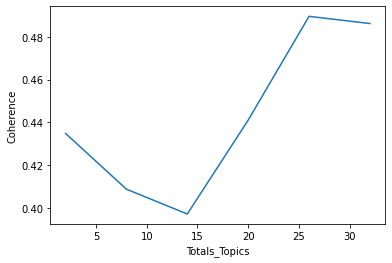

In [13]:
x = [2,8,14,20,26,32]
plt.plot(x, coherence_val)
plt.xlabel("Totals_Topics")
plt.ylabel("Coherence")
plt.show()

In [14]:
for i, j in zip(x, coherence_val):
    print("Num Topics =", i, "| Coherence Value:", round(j, 4))

Num Topics = 2 | Coherence Value: 0.4348
Num Topics = 8 | Coherence Value: 0.4087
Num Topics = 14 | Coherence Value: 0.3971
Num Topics = 20 | Coherence Value: 0.4411
Num Topics = 26 | Coherence Value: 0.4897
Num Topics = 32 | Coherence Value: 0.4863


In [15]:
# The optimal model is with 8 topics which is model: 5. 
optimal_model = LDA_models[4]
pprint(optimal_model.print_topics())


[(24,
  '0.080*"text" + 0.080*"approach" + 0.080*"base" + 0.080*"summarization" + '
  '0.041*"customer" + 0.041*"modification" + 0.041*"automatic" + '
  '0.041*"gather" + 0.041*"product" + 0.041*"concern"'),
 (21,
  '0.126*"summarization" + 0.106*"text" + 0.069*"approach" + 0.062*"automatic" '
  '+ 0.044*"extractive" + 0.044*"extraction" + 0.044*"newspaper" + '
  '0.044*"keyword" + 0.044*"telugu" + 0.028*"use"'),
 (15,
  '0.133*"summarization" + 0.130*"text" + 0.088*"use" + 0.033*"document" + '
  '0.025*"extractive" + 0.022*"learning" + 0.022*"modify" + 0.022*"base" + '
  '0.022*"arabic" + 0.022*"algorithm"'),
 (22,
  '0.086*"sentence" + 0.086*"text" + 0.086*"summarization" + 0.044*"multi" + '
  '0.044*"use" + 0.044*"automate" + 0.044*"assessment" + 0.044*"applicable" + '
  '0.044*"base" + 0.044*"rule"'),
 (19,
  '0.144*"summarization" + 0.089*"text" + 0.068*"base" + 0.041*"extractive" + '
  '0.041*"approach" + 0.028*"network" + 0.028*"sentence" + 0.028*"semantic" + '
  '0.014*"judgmen

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [16]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [17]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dic_word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [18]:
LSA_list, coherence_values = compute_coherence_values(dictionary=dic_word, doc_term_matrix=corpus, doc_clean=df_lemmatized, stop=38, start=2, step=6)

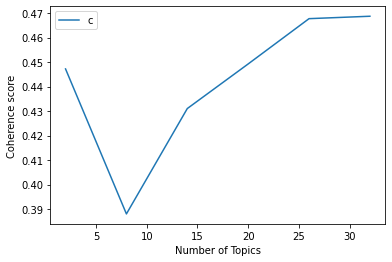

In [19]:
x = [2,8,14,20,26,32]
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
for i, j in zip(x, coherence_values):
    print("Num Topics =", i, "| Coherence Value:", round(j, 4))

Num Topics = 2 | Coherence Value: 0.4472
Num Topics = 8 | Coherence Value: 0.3881
Num Topics = 14 | Coherence Value: 0.4311
Num Topics = 20 | Coherence Value: 0.4493
Num Topics = 26 | Coherence Value: 0.4677
Num Topics = 32 | Coherence Value: 0.4687


In [21]:
# The optimal model is 6. 
optimal_model = LSA_list[5]
pprint(optimal_model.print_topics())


[(0,
  '0.655*"summarization" + 0.622*"text" + 0.222*"use" + 0.163*"base" + '
  '0.148*"approach" + 0.127*"automatic" + 0.111*"extractive" + '
  '0.083*"document" + 0.061*"sentence" + 0.058*"technique"'),
 (1,
  '-0.552*"base" + -0.474*"use" + 0.328*"text" + -0.240*"approach" + '
  '-0.209*"document" + -0.181*"graph" + -0.167*"semantic" + 0.154*"extractive" '
  '+ 0.151*"review" + -0.118*"multi"'),
 (2,
  '-0.594*"use" + 0.524*"base" + 0.215*"approach" + 0.214*"automatic" + '
  '-0.203*"document" + -0.153*"learning" + -0.147*"algorithm" + -0.123*"deep" '
  '+ 0.109*"semantic" + 0.098*"technique"'),
 (3,
  '0.521*"approach" + -0.380*"sentence" + -0.311*"extractive" + 0.269*"review" '
  '+ -0.263*"automatic" + -0.246*"technique" + 0.168*"online" + '
  '-0.152*"document" + -0.141*"base" + -0.118*"new"'),
 (4,
  '-0.513*"automatic" + 0.428*"extractive" + 0.352*"document" + -0.260*"use" + '
  '0.212*"multi" + -0.207*"extraction" + 0.207*"summarization" + -0.184*"text" '
  '+ 0.114*"approach

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

Model:LDA
The optimal_model for LDA is 26 and Coherence score: 0.4877.

model:LSA
The optimal model for LSA is 32 and Coherence score: 0.4844.

LDA model perfomed well at 26 but LSA at 32. 
LSA learns latent topics by performing a matrix decomposition on the term-document matrix whereas LDA assumes a Dirichlet prior over the latent topics. Theortically, LSA has lower accuracy compared to LDA.

Therefore, LDA model is better than LSA.